In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from warnings import filterwarnings
filterwarnings(action='ignore')

In [30]:
test=pd.read_csv('E:/AN/WORK/Prodigy InfoTech Data Science/test.csv')
train=pd.read_csv('E:/AN/WORK/Prodigy InfoTech Data Science/train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [19]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Johnson, Mr. Alfred",male,...,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [26]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [27]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [33]:
males=len(train[train['Sex']=='male'])
print("Survived Males = ", males)

Survived Males =  577


In [35]:
females=len(train[train['Sex']=='female'])
print("Survived Females = ",females)

Survived Females =  314


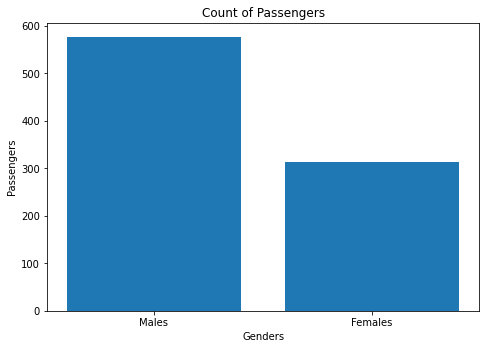

In [53]:
graph1=plt.figure()
ax=graph1.add_axes([0,0,1,1])

gender=['Males','Females']
index=[males,females]
ax.bar(gender,index)
plt.title("Count of Passengers")
plt.xlabel("Genders")
plt.ylabel("Passengers")
plt.show()

In [55]:
survived=len(train[train['Survived']==1])
dead=len(train[train['Survived']==0])

train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


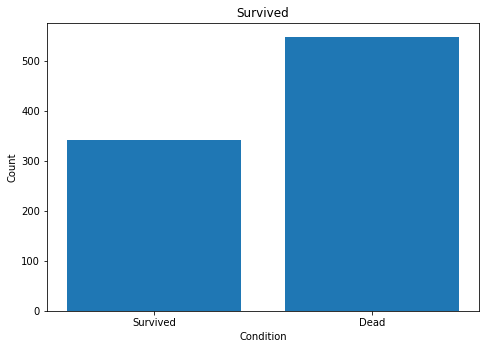

In [56]:
graph2=plt.figure()
ax=graph2.add_axes([0,0,1,1])

condition=['Survived','Dead']
data=[survived,dead]

ax.bar(condition,data)
plt.title("Survived")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()

([<matplotlib.axis.XTick at 0x1fad5c564c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

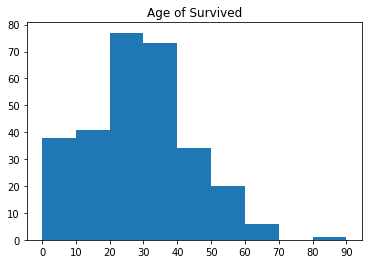

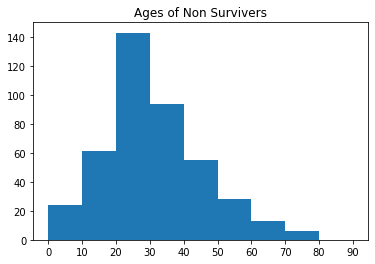

In [59]:
graph3=plt.figure()
age=train.loc[train.Survived==1,'Age']
plt.title('Age of Survived')
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

graph4=plt.figure()
age=train.loc[train.Survived==0,'Age']
plt.title("Ages of Non Survivers")
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))